## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6KAmKqZNEe3aXBezMqVybfpt9kLUCeqejDYNsXRC-NjOyC_deB5lo


Mounted at /content/drive


In [2]:
!cd drive/My\ Drive/national_data_science_bowl/data

## Download and extract Kaggle dataset

In [156]:
 from google.colab import files
 files.upload()

In [ ]:
 !pip install -q kaggle

In [ ]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/

In [ ]:
 !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 !kaggle competitions download -c datasciencebowl --force

  0% 0.00/1.53M [00:00<?, ?B/s]
100% 1.53M/1.53M [00:00<00:00, 50.0MB/s]
 85% 65.0M/76.2M [00:00<00:00, 62.3MB/s]
100% 76.2M/76.2M [00:01<00:00, 78.6MB/s]
 97% 337M/347M [00:03<00:00, 119MB/s]
100% 347M/347M [00:03<00:00, 112MB/s]
  0% 0.00/850k [00:00<?, ?B/s]
100% 850k/850k [00:00<00:00, 54.9MB/s]


In [ ]:
!mkdir unzipped_data
!unzip train.zip -d unzipped_data &> /dev/null
!unzip test.zip -d unzipped_data &> /dev/null
!echo "Data extraction complete"

Data extraction complete


## Exploratory data analysis

In [3]:
from pathlib import Path

In [ ]:
data_path = Path("/content/drive/MyDrive/national_data_science_bowl/data/unzipped_data")
train_path = data_path / "train"
test_path = data_path / "test"

# Check num of classes in train and test dirs
print(f"Num train classes: {len(list(train_path.iterdir()))}")
# print(f"Num test cases: {len(list(test_path.glob('*.jpg')))}")
  # Note test folder seems to contain unlabelled test cases

Num train classes: 121


In [2]:
import matplotlib.pyplot as plt

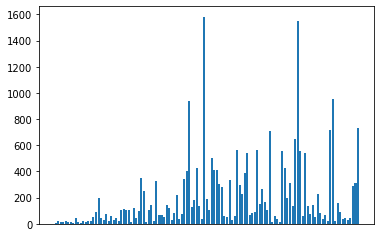

Num train images: 24268


In [4]:
# Check number cases in each folder
taxon = []
num_images = []
for subdir in train_path.iterdir():
  taxon.append(subdir.name)
  num_images.append(len(list(subdir.glob("*.jpg"))))

plt.bar(taxon, num_images)
plt.gca().xaxis.set_visible(False)
plt.show()
  # Plot shows class imbalance

print(f"Num train images: {sum(num_images)}")

In [5]:
import pandas as pd

In [6]:
taxon_freq_df = pd.DataFrame({"taxon": taxon,
                              "freq": num_images})

# Get most frequently occurring classes
taxon_freq_df.sort_values(by=["freq"], ascending=False).head(10)

,taxon,freq
59,trichodesmium_puff,1583
96,chaetognath_other,1547
110,copepod_cyclopoid_oithona_eggs,951
53,protist_other,938
120,detritus_other,731
109,copepod_cyclopoid_oithona,719
85,acantharia_protist,711
95,chaetognath_non_sagitta,652
80,trichodesmium_bowtie,566
72,hydromedusae_solmaris,562


In [9]:
# Get least frequently occurring classes
taxon_freq_df.sort_values(by=["freq"], ascending=True).head(10)

,taxon,freq
10,hydromedusae_haliscera_small_sideview,9
0,heteropod,10
7,fish_larvae_deep_body,10
6,hydromedusae_other,12
12,pteropod_theco_dev_seq,13
86,acantharia_protist_big_center,13
36,invertebrate_larvae_other_A,14
30,ephyra,14
5,hydromedusae_typeE,14
2,fish_larvae_very_thin_body,16


In [7]:
from multiprocessing import Pool
from PIL import Image

In [23]:
# ## Uncomment to run--may required 10-15 mins
# # Check image mode and dimensions
# mode = []
# width = []
# height = []

# def get_image_properties(image_path):
#   image = Image.open(image_path)
#   im_width, im_height = image.size
#   mode = image.mode
#   width = im_width
#   height = im_height
#   # return image_path
#   return [mode, width, height]


# def get_folder_properties(folder_path):
#   folder_path = Path(folder_path) 
#   image_gen = folder_path.glob("*.jpg")
#   folder_properties = []
#   for image_path in image_gen:
#     image_properties = get_image_properties(image_path)
#     folder_properties.append(image_properties)
#   return folder_properties


# proc_pool = Pool(24)
# output = proc_pool.map(get_folder_properties, train_path.iterdir())
# proc_pool.close()
# proc_pool.join()

[[['L', 125, 97], ['L', 314, 286], ['L', 254, 90], ['L', 60, 101], ['L', 59, 81], ['L', 204, 290], ['L', 130, 70], ['L', 358, 95], ['L', 114, 93], ['L', 229, 162]], [['L', 78, 90], ['L', 123, 46], ['L', 156, 53], ['L', 50, 31], ['L', 106, 67], ['L', 57, 37], ['L', 135, 45], ['L', 108, 54], ['L', 71, 72], ['L', 50, 32], ['L', 140, 164], ['L', 139, 54], ['L', 139, 56], ['L', 45, 31], ['L', 51, 40], ['L', 177, 160], ['L', 66, 63], ['L', 271, 57], ['L', 105, 124], ['L', 100, 104], ['L', 181, 68], ['L', 102, 56], ['L', 63, 86], ['L', 51, 38]], [['L', 49, 60], ['L', 74, 147], ['L', 54, 43], ['L', 65, 40], ['L', 51, 39], ['L', 36, 62], ['L', 47, 47], ['L', 76, 159], ['L', 51, 153], ['L', 35, 55], ['L', 31, 60], ['L', 32, 51], ['L', 53, 39], ['L', 192, 164], ['L', 58, 49], ['L', 146, 58]], [['L', 229, 155], ['L', 226, 83], ['L', 110, 135], ['L', 132, 69], ['L', 129, 102], ['L', 397, 250], ['L', 315, 204], ['L', 123, 117], ['L', 222, 90], ['L', 94, 143], ['L', 117, 66], ['L', 210, 74], ['L', 38

In [36]:
# Flatten outputs into single list
flattened_output = [image_output for folder_output in output for image_output in folder_output]

metadata_df = pd.DataFrame(flattened_output, columns=["type", "width", "height"])
metadata_df["aspect_ratio"] = metadata_df["width"]/metadata_df["height"]
metadata_df.head()

,type,width,height,aspect_ratio
0,L,125,97,1.288660
1,L,314,286,1.097902
2,L,254,90,2.822222
3,L,60,101,0.594059
4,L,59,81,0.728395


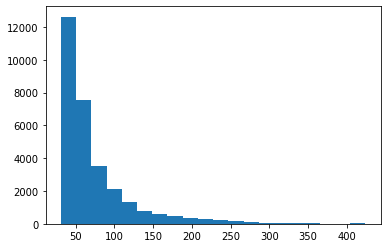

In [35]:
plt.hist(metadata_df["width"], bins=20)
plt.show()

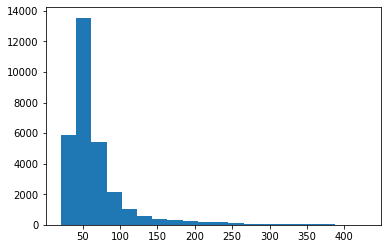

In [37]:
plt.hist(metadata_df["height"], bins=20)
plt.show()

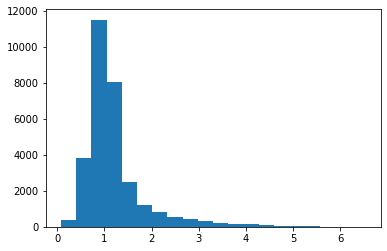

In [38]:
plt.hist(metadata_df["aspect_ratio"], bins=20)
plt.show()

In [45]:
import random
import numpy as np

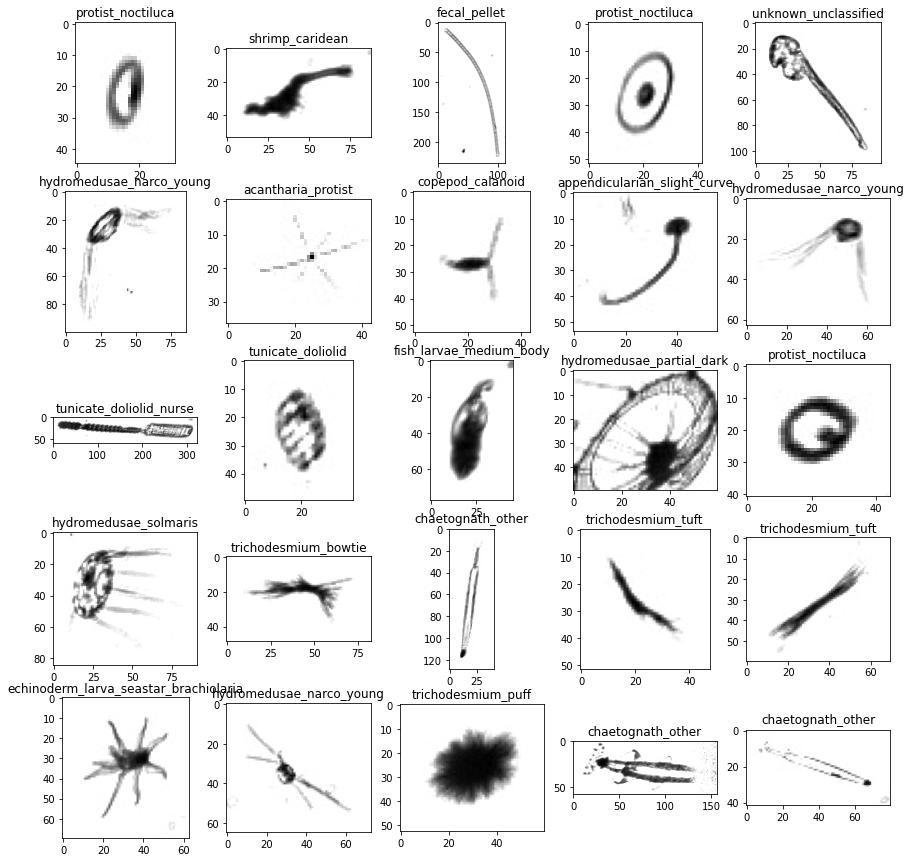

In [93]:
# Preview images
train_image_paths = []
for subdir in train_path.iterdir():
  subdir_filepaths = list(subdir.glob("*.jpg"))
  train_image_paths.append(subdir_filepaths)

train_image_paths = [filepaths for subdir_filepaths in train_image_paths for filepaths in subdir_filepaths]
sample_indices = random.sample(range(len(train_image_paths)), 25)
sample_image_paths = [train_image_paths[sample_index] for sample_index in sample_indices]

fig, ax = plt.subplots(5, 5, figsize=(5*3, 5*3))
for index, path in enumerate(sample_image_paths):
    ax[index%5 - 1, index//5].set_title(path.parent.stem)
    ax[index%5 - 1, index//5].imshow(np.array(Image.open(path)), cmap="gray")

# Brightness and contrast appears quite consistent

## Train-val split

In [133]:
import shutil
from sklearn.model_selection import train_test_split

In [117]:
taxon_labels = [path.parent.stem for path in train_image_paths]

# Split into train and val sets
# Stratify by taxon
train_paths, val_paths = train_test_split(train_image_paths,
                                          test_size=0.2,
                                          random_state=230121,
                                          stratify=taxon_labels)

print(len(train_paths))
print(len(val_paths))

24268
6068


In [17]:
# Make val folders
val_path = data_path / "val"
val_path.mkdir()

# new_val_subdirs = [val_path / taxon_name for taxon_name in taxon]
# for subdir in new_val_subdirs:
#   subdir.mkdir()

In [142]:
# # Move files from train to val
new_val_paths = [val_path / Path(path.parent.stem) / path.name for path in val_paths]
new_old_path_pairs = [(old_path, new_path) for old_path, new_path in zip(val_paths, new_val_paths)]

proc_pool = Pool(24)
output = proc_pool.starmap(shutil.move, new_old_path_pairs)
proc_pool.close()

print(len(list(train_path.glob("**/*.jpg"))))
print(len(list(val_path.glob("**/*.jpg"))))

24268
6068


## Datapipeline

(97, 125)


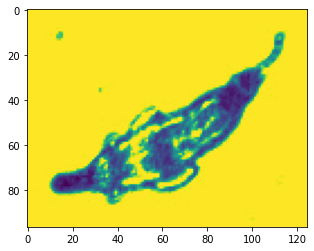

In [62]:
input_image = np.array(Image.open(path))
plt.imshow(input_image)
print(input_image.shape)

(125, 125)


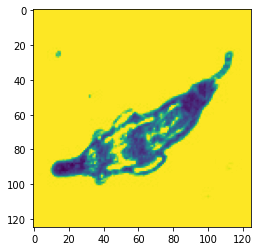

In [51]:
# Pad images to make them square
def pad_to_square(image):
  dim0, dim1 = image.shape
  
  if dim0 == dim1:
    return image

  if dim0 > dim1:
    pad_width = ((dim0-dim1)//2, (dim0-dim1)//2+(dim0-dim1)%2)
    return np.pad(image, ((0,0), pad_width), "edge")
  else:
    pad_width = ((dim1-dim0)//2, (dim1-dim0)//2)
    return np.pad(image, (pad_width, (0,0)), "edge")

padded_image = pad_to_square(input_image)
plt.imshow(padded_image)
print(padded_image.shape)

In [53]:
from skimage.transform import resize

(224, 224)


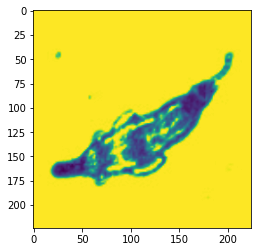

In [59]:
# Upsize images
# Did not downsize as that would lose information from larger images
cnn_input_size = (224, 224)
resized_image = resize(padded_image, cnn_input_size)

plt.imshow(resized_image)
print(resized_image.shape)

In [60]:
# Convert greyscale image to RGB
def l_to_rgb(image):
  image = np.stack((image,) * 3, axis=-1) * 255
  image = image.astype("uint8")
  return image

print(resized_image.shape)
rgb_image = l_to_rgb(resized_image)
print(rgb_image.shape)

(224, 224)
(224, 224, 3)


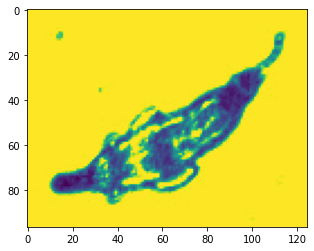

In [63]:
# Wrap all preprocessing steps into a pipeline
def preprocess(image, cnn_input_size=(224,224)):
  padded_image = pad_to_square(image)
  resized_image = resize(padded_image, cnn_input_size)
  rgb_image = l_to_rgb(resized_image)
  return rgb_image

plt.imshow(input_image)
plt.show()

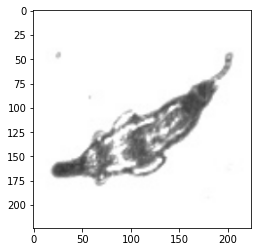

In [64]:
plt.imshow(preprocess(input_image))
plt.show()

## Modelling

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Calculate class weights to account for imbalance
# Inversely weighted by class frequency
taxon_freq_df["weight"] = 1/taxon_freq_df["freq"]
taxon_freq_df["weight_scaled"] = taxon_freq_df["weight"]/taxon_freq_df["weight"].sum()
taxon_freq_df.head()

,taxon,freq,weight,weight_scaled
0,heteropod,8,0.125000,0.045642
1,invertebrate_larvae_other_B,19,0.052632,0.019218
2,fish_larvae_very_thin_body,13,0.076923,0.028087
3,hydromedusae_liriope,15,0.066667,0.024342
4,hydromedusae_narco_dark,19,0.052632,0.019218


In [31]:
class_weight = {}
for index, row in taxon_freq_df.iterrows():
  class_weight[index] = row["weight_scaled"]

In [163]:
# Parameters
target_size = (224, 224)
batch_size = 32
input_shape = target_size + (3,)
lr = 0.001
dropout = 0.5
n_epochs = 10

In [18]:
# Augment with random flips and rotations to simulate different orientations
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=0.2)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size
)

val_gen = datagen.flow_from_directory(
    val_path,
    target_size=target_size,
    color_mode="rgb",
    batch_size=batch_size,
    shuffle=False
)

Found 24268 images belonging to 121 classes.
Found 6068 images belonging to 121 classes.


In [20]:
num_classes = max(train_gen.labels)+1
num_classes

121

In [164]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape, include_top=False)

inputs = tf.keras.Input(shape=input_shape)

# x = data_augmentation(inputs)
x = tf.cast(inputs, tf.float32)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)

x = pretrained_model(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dropout)(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(dropout)(x)

outputs = tf.keras.layers.Dense(num_classes,
                                activation="softmax")(x) # change to num of output classes

model = tf.keras.Model(inputs, outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=optimizer,
    metrics=["categorical_accuracy", "AUC"],
)

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf.cast_7 (TFOpLambda)       (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv_7 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_7 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1280)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               6558

In [23]:
# Set up weights directory
weights_path = Path("/content/drive/MyDrive/national_data_science_bowl/weights")
weights_path.mkdir()

In [165]:
model_history = model.fit(x=train_gen,
                          epochs=n_epochs,
                          validation_data=val_gen,
                          class_weight=class_weight)

model.save(weights_path / "weights.h5")


Epoch 1/10
759/759 [==============================] - 377s 491ms/step - loss: 0.0323 - categorical_accuracy: 0.1968 - auc: 0.7540 - val_loss: 5.9913 - val_categorical_accuracy: 0.0402 - val_auc: 0.6128
Epoch 2/10
759/759 [==============================] - 368s 485ms/step - loss: 0.0151 - categorical_accuracy: 0.3769 - auc: 0.8870 - val_loss: 6.1788 - val_categorical_accuracy: 0.0428 - val_auc: 0.6069
Epoch 3/10
759/759 [==============================] - 367s 483ms/step - loss: 0.0134 - categorical_accuracy: 0.4104 - auc: 0.9125 - val_loss: 6.3093 - val_categorical_accuracy: 0.0481 - val_auc: 0.6068
Epoch 4/10
759/759 [==============================] - 366s 482ms/step - loss: 0.0122 - categorical_accuracy: 0.4314 - auc: 0.9203 - val_loss: 6.2298 - val_categorical_accuracy: 0.0422 - val_auc: 0.6206
Epoch 5/10
759/759 [==============================] - 366s 482ms/step - loss: 0.0115 - categorical_accuracy: 0.4664 - auc: 0.9290 - val_loss: 6.1127 - val_categorical_accuracy: 0.0489 - val_au

In [171]:
history_df = pd.DataFrame(model_history.history)
history_df.to_csv(weights_path / "history.csv")

In [172]:
history_df.head()

,loss,categorical_accuracy,auc,val_loss,val_categorical_accuracy,val_auc
0,0.023432,0.279092,0.821747,5.991251,0.040211,0.612815
1,0.014685,0.386970,0.894137,6.178816,0.042848,0.606856
2,0.013243,0.418823,0.913150,6.309261,0.048121,0.606811
3,0.011901,0.444701,0.922428,6.229816,0.042189,0.620571
4,0.011723,0.457681,0.927369,6.112652,0.048945,0.621279


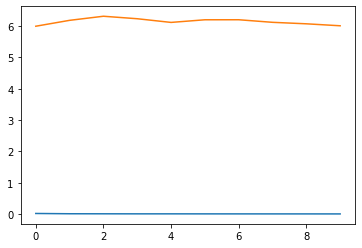

In [181]:
plt.plot(list(history_df.index), history_df["loss"],
         list(history_df.index), history_df["val_loss"])
plt.show()

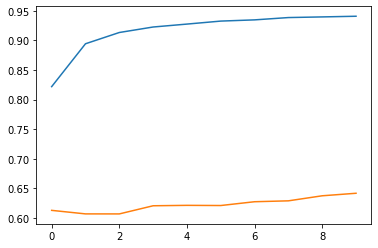

In [182]:
plt.plot(list(history_df.index), history_df["auc"],
         list(history_df.index), history_df["val_auc"])
plt.show()

## Evaluation

In [109]:
# !cd unzipped_data
# !mv -r test/ test_sub/
# !cp -r test_sub/ /content/drive/MyDrive/national_data_science_bowl/data

In [123]:
test_datagen = ImageDataGenerator()
test_gen = test_datagen.flow_from_directory(
              test_path,
              target_size=target_size,
              color_mode="rgb",
              batch_size=batch_size,
          )

Found 0 images belonging to 0 classes.


In [139]:
# Get actual class labels of validation set
class_actual = []
counter = 0
for _, labels in val_gen:
  if counter == 190:
    break
  for row in labels:
    label = taxon_freq_df["taxon"][np.argmax(row)]
    class_actual.append(label)
  counter += 1

len(class_actual)

6068

In [183]:
eval_probs = model.predict(val_gen)

In [184]:
# Get predicted class labels of validation set
class_pred = []
for row in eval_probs:
  label = taxon_freq_df["taxon"][np.argmax(row)]
  class_pred.append(label)

len(class_pred)

6068

In [149]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [194]:
matrix = confusion_matrix(class_actual, class_pred)
per_class_acc = matrix.diagonal()/matrix.sum(axis=1)
print(f"Mean per-class acc: {np.mean(per_class_acc)}")
print(f"SD per-class acc: {np.sqrt(np.var(per_class_acc))}")

Mean per-class acc: 0.009681195685957116
SD per-class acc: 0.023636834368463082


In [192]:
acc_df = pd.DataFrame({"taxon": taxon_freq_df["taxon"], "val_acc": per_class_acc})
acc_df.sort_values(by=["val_acc"], ascending=False).head(10)

,taxon,val_acc
26,siphonophore_calycophoran_rocketship_adult,0.154412
66,tunicate_partial,0.094340
46,hydromedusae_h15,0.090909
76,trichodesmium_tuft,0.086331
73,protist_fuzzy_olive,0.068493
88,amphipods,0.064748
29,polychaete,0.048193
56,echinoderm_larva_seastar_brachiolaria,0.044944
118,detritus_blob,0.043716
31,shrimp_sergestidae,0.042553


In [193]:
acc_df.sort_values(by=["val_acc"], ascending=True).head(10)

,taxon,val_acc
0,heteropod,0.0
84,siphonophore_physonect,0.0
83,siphonophore_calycophoran_abylidae,0.0
81,hydromedusae_partial_dark,0.0
80,trichodesmium_bowtie,0.0
79,fish_larvae_myctophids,0.0
77,echinoderm_larva_pluteus_typeC,0.0
75,siphonophore_calycophoran_rocketship_young,0.0
74,radiolarian_chain,0.0
72,hydromedusae_solmaris,0.0


In [195]:
accuracy_score(class_actual, class_pred)

0.022577455504284773

In [ ]:
# classification_report(class_actual, class_pred, output_dict=True)

## Inference

In [90]:
# Preprocess and perform inference on test image
input_image = np.array(Image.open(list(test_path.glob('*.jpg'))[0]))
processed_image = preprocess(input_image)
pred_probs = model.predict(np.expand_dims(processed_image, 0))

amphipods


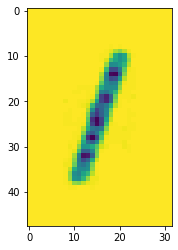

In [94]:
# Get most probable class
highest_prob = np.max(pred_probs)
index = np.where(pred_probs == highest_prob)[1][0]
print(taxon_freq_df["taxon"][index])

plt.imshow(input_image)
plt.show()